In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [58]:
# get dates
today_datetime = datetime.datetime.now()
today = today_datetime.date()
past_30_days = today_datetime - datetime.timedelta(days=30)
dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%y')

# read csv into df
df = pd.read_csv('data.csv', parse_dates=['date'], date_parser=dateparse)


/var/folders/l_/flqtngrd05d8qnbgmbtshrx00000gn/T/ipykernel_29310/134876702.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x, '%d/%m/%y')


In [72]:
# Input data
"""
gender = "f"
age = 24 # years
height = 167 # cm
weight = 60 # kg
training_days = 2 # number of days a week they train
training_time = 3 # hrs a week you can spend training
bpm = 125
power = 220 # average watts
route_gradient = [3, 6, 10, 8, 9, 5, 2, 0, 0, -2,
                  -5, -7, -5, -1, 0, 2, 1, 3, 5, 2]
route_speed = [12, 8, 6, 7, 6, 9, 13, 16, 17, 20,
               24, 28, 25, 20, 17, 14, 15, 12, 9, 13]
"""

# constants
# highest possible average power output
POWER_MAX_AVG = 500 # watts

def calc(df):
    # extract variables
    gender = df.iloc[0]['gender']
    age = df.iloc[0]['age']
    height = df.iloc[0]['height']
    weight = df.iloc[0]['weight']
    training_days = df.iloc[0]['training_days']
    training_time = df.iloc[0]['training_time']
    bpm = df.iloc[0]['bpm']
    power = df.iloc[0]['power']

    # ideal bpm
    bpm_ideal = (220 - age)*0.6

    # basal metabolic rate
    if gender == "m":
        bmr = 10*weight + 6.25*height - 5*age + 5
    else:
        bmr = 10*weight + 6.25*height - 5*age - 161

    # physical activitiy level
    if training_days == 0:
        pal = 1.2
    elif training_days >=1 and training_days <=3:
        pal = 1.375
    elif training_days >= 4 and training_days <=5:
        pal = 1.55
    else:
        pal = 1.725

    # maintanence calories
    calories = bmr*pal

    # ideal speed for gradient of slope
    speed_avg = sum(route_speed) / len(route_speed)
    speed_list = [speed_avg*(1-gradient/100*0.33) for gradient in route_gradient]

    # average power ratio
    power_ratio = power / POWER_MAX_AVG
    power_diff = power_ratio - 1

    # cardio fitness ratio
    bpm_ratio = bpm / bpm_ideal
    bpm_diff = 1 - bpm_ratio


    # calculate percentage focus on power and cardio
    total = abs(power_diff + bpm_diff)
    power_percent = abs(power_diff) / total
    bpm_percent = abs(bpm_diff) / total

    # number of hours a week spending on power training
    power_training = power_percent*training_time
    # number of hours a week spending on cardio training
    cardio_training = bpm_percent*training_time

    if power_percent > bpm_percent:
        bottleneck = "power"
    else:
        bottleneck = "cardio"

    print(f"At the moment {bottleneck} is your weakest attribute\n\
    To reach optimal performance, spend {power_training:.2f} hours a week on power training\n\
    and {cardio_training:.2f} hours a week on cardio training")

    print(f"The amount of calories you should be eating everyday for your activity level is {calories:.2f} calories")
    return

In [73]:
calc(df)

At the moment power is your weakest attribute
    To reach optimal performance, spend 3.32 hours a week on power training
    and 0.32 hours a week on cardio training
The amount of calories you should be eating everyday for your activity level is 1873.78 calories


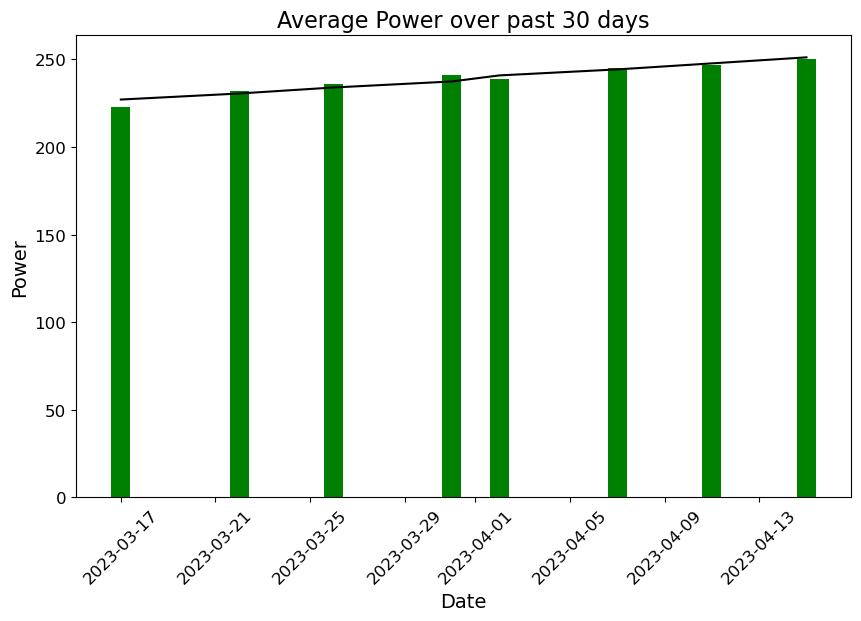

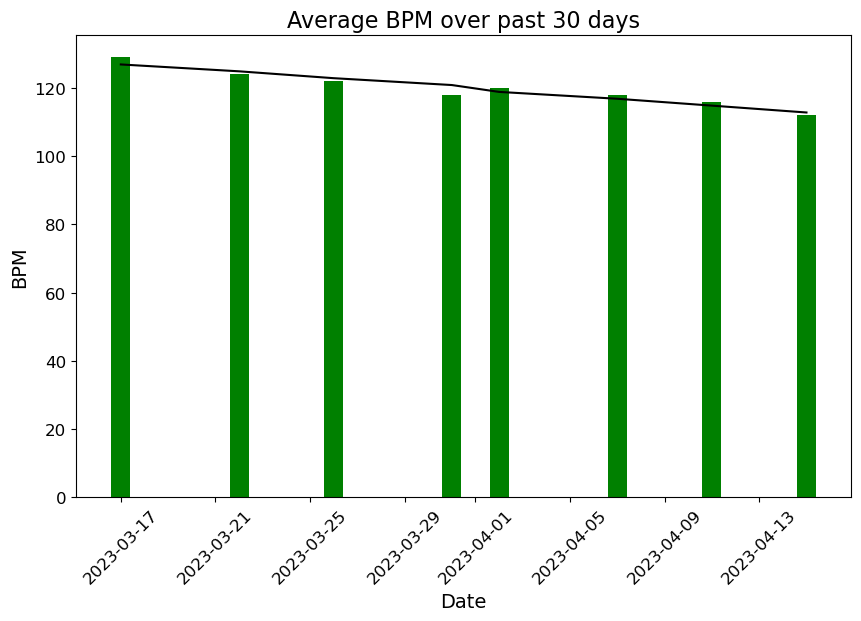

In [59]:
# calculate the averages over past 30 days

# filter df for rows from past 30 days
df_filtered = df[df['date'].between(past_30_days, today_datetime)]

# calculate averages
power_30_day_avg = df_filtered['power'].mean()
bpm_30_day_avg = df_filtered['bpm'].mean()



# graph power
plt.figure(figsize=(10,6))
plt.bar(df_filtered['date'], df_filtered['power'], color = 'green')

# line of best fit
x = np.array(range(len(df_filtered)))
y = df_filtered['power']
coefficients = np.polyfit(x, y, 1)
plt.plot(df_filtered['date'], np.polyval(coefficients, x), color='black')

plt.xlabel('Date', fontsize=14)
plt.ylabel('Power', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Average Power over past 30 days', fontsize=16)
plt.show()



# graph bpm
plt.figure(figsize=(10,6))
plt.bar(df_filtered['date'], df_filtered['bpm'], color = 'green')

# line of best fit
x = np.array(range(len(df_filtered)))
y = df_filtered['bpm']
coefficients = np.polyfit(x, y, 1)
plt.plot(df_filtered['date'], np.polyval(coefficients, x), color='black')

plt.xlabel('Date', fontsize=14)
plt.ylabel('BPM', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.title('Average BPM over past 30 days', fontsize=16)
plt.show()


In [ ]:
# calorie intake
